In [14]:
# change csv data to np.array
import csv
import pandas as pd
pre_path = 'preprocessed/SPL_measurements.csv'
df = pd.read_csv(pre_path)

data = df.iloc[:, :-4].values
labels = df.iloc[:, -4].values
labels_pump = df.iloc[:, -3].values
labels_valve = df.iloc[:, -2].values
labels_rpm = df.iloc[:, -1].values

print(data)
print(np.shape(data))
# print(data)
# print(labels)
# print(labels_pump)
# print(labels_valve)
# print(labels_rpm)

# print(type(data))
# print(data.shape)
# print(data.dtype)

# print('length: ', len(data[0]))
# print(data[60][:10])

[[51.57299584 55.13792726 54.71951455 ... 60.52887966 59.75575401
  46.78886963]
 [49.47534196 55.22350322 50.89933357 ... 44.77302173 52.71052425
  51.62147535]
 [48.23555733 49.89814543 63.61419566 ... 40.39493435 51.49159046
  46.73246755]
 ...
 [26.81693392 37.49581735 42.33313461 ... 55.80998492 46.70412857
  44.41105729]
 [40.68352866 47.56803405 43.47534915 ... 56.46149251 48.51652705
  55.48561996]
 [45.96382644 53.09971721 44.29945974 ... 54.70822684 46.50312381
  47.59369401]]
(660, 512)


[[51.57299584 55.13792726 54.71951455 ... 60.52887966 59.75575401
  46.78886963]
 [49.47534196 55.22350322 50.89933357 ... 44.77302173 52.71052425
  51.62147535]
 [48.23555733 49.89814543 63.61419566 ... 40.39493435 51.49159046
  46.73246755]
 ...
 [26.81693392 37.49581735 42.33313461 ... 55.80998492 46.70412857
  44.41105729]
 [40.68352866 47.56803405 43.47534915 ... 56.46149251 48.51652705
  55.48561996]
 [45.96382644 53.09971721 44.29945974 ... 54.70822684 46.50312381
  47.59369401]]
[[51.57299584 49.47534196 48.23555733 ... 26.81693392 40.68352866
  45.96382644]
 [55.13792726 55.22350322 49.89814543 ... 37.49581735 47.56803405
  53.09971721]
 [54.71951455 50.89933357 63.61419566 ... 42.33313461 43.47534915
  44.29945974]
 ...
 [60.52887966 44.77302173 40.39493435 ... 55.80998492 56.46149251
  54.70822684]
 [59.75575401 52.71052425 51.49159046 ... 46.70412857 48.51652705
  46.50312381]
 [46.78886963 51.62147535 46.73246755 ... 44.41105729 55.48561996
  47.59369401]]


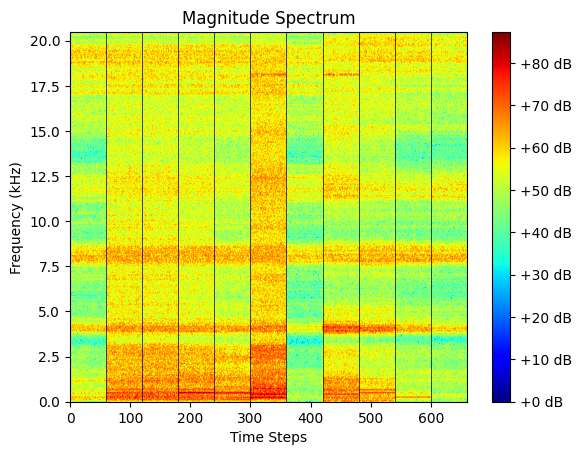

numpy.ndarray

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your data is stored in a numpy array named "data"
# The data has shape (time_steps, frequency_bins)

# Compute the magnitude spectrum
magnitude_spectrum = np.abs(data)
print(magnitude_spectrum)
print(magnitude_spectrum.T)
# Determine the frequency range of your data
freq_min = 0
freq_max = 20480 / 1000

# Plot the magnitude spectrum as a heatmap
# we have to transpose the spectrum because on the y axis we want the frequency
# which is stored in the 40 hertz bins on the x axis in the dataset and the 
# way around.
fig, ax = plt.subplots()
heatmap = ax.imshow(magnitude_spectrum.T, cmap='jet', aspect='auto', origin='lower',
                    extent=[0, magnitude_spectrum.shape[0], freq_min, freq_max])
                    # extend sets the bounding box for the plot, that means that 
                    # the x axis goes from 0 to the nr. of rows (time)
                    # and the y axis from freq_min to freq_max

# Add a colorbar
cbar = fig.colorbar(heatmap, format='%+2.0f dB')

# Add vertical lines every 60 steps
for i in range(60, magnitude_spectrum.shape[0], 60):
    ax.axvline(i, color='black', linewidth=0.5)
    
# Add axis labels and title
ax.set_xlabel('Time Steps')
ax.set_ylabel('Frequency (kHz)')
ax.set_title('Magnitude Spectrum')

# Display the plot
plt.show()
type(magnitude_spectrum.T)

# Load data

In [ ]:
# change csv data to np.array
import csv
import pandas as pd
pre_path = 'preprocessed/SPL_measurements.csv'
df = pd.read_csv(pre_path)

data = df.iloc[:, :-4].values
labels = df.iloc[:, -4].values
labels_pump = df.iloc[:, -3].values
labels_valve = df.iloc[:, -2].values
labels_rpm = df.iloc[:, -1].values

print(data)
print(np.shape(data))

# create power-spectrogram and mel-spectrogram from db_spectrogram

In [29]:
import numpy as np
import librosa

# Your original data
db_spectrogram = data

# Convert from dB to power
power_spectrogram = 10.0 ** (db_spectrogram / 10.0)


# Create a Mel filter matrix
mel_filter = librosa.filters.mel(sr=44100,  # Modify based on your sample rate
                                 n_fft=1022,  # Modify to align with your data
                                 n_mels=128,  # Modify based on your desired output size
                                 fmin=0,
                                 fmax=20480,  # Modify based on your frequency range
                                 htk=True,  # Use the HTK formula for converting frequencies
                                 )

# Transpose your data (so that frequency bins are in the second dimension)
power_spectrogram = power_spectrogram.T

# Apply the Mel filter to the power spectrogram
mel_spectrogram = np.dot(mel_filter, power_spectrogram)



# Linear and log-frequency spectrogram

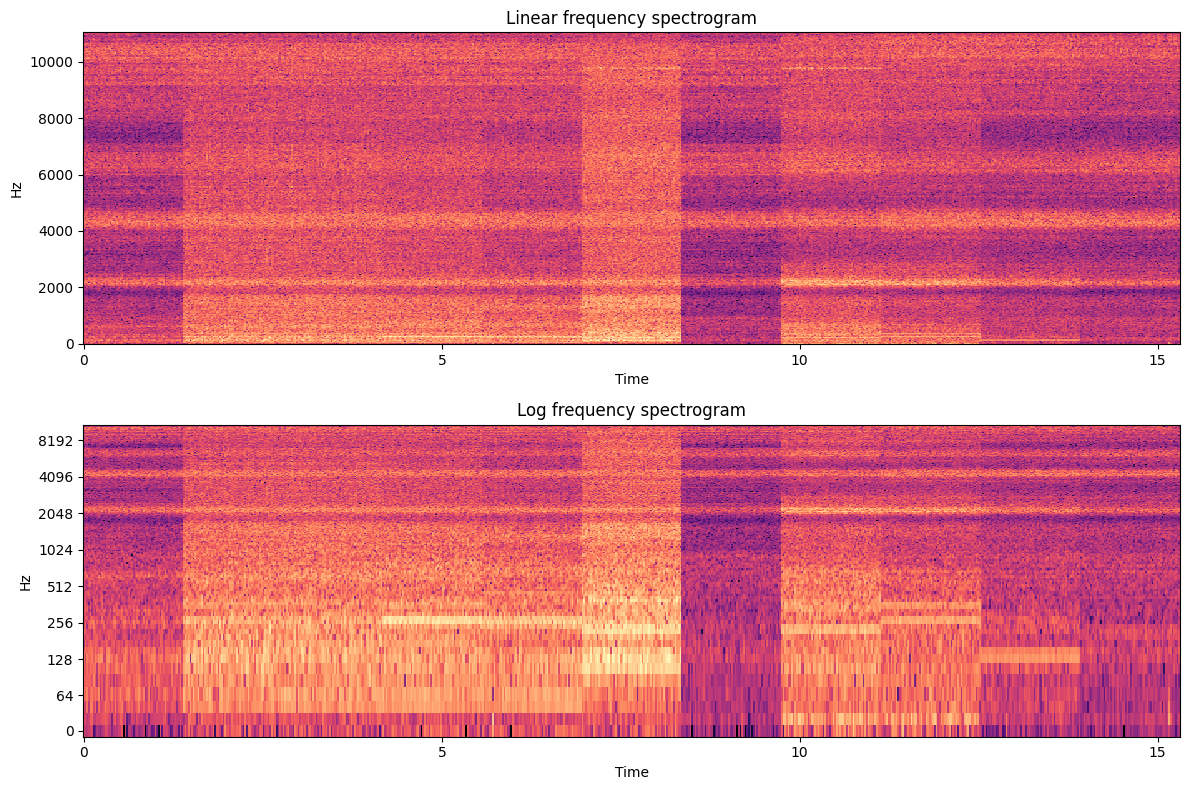

In [64]:
# Convert your original data to dB
spectrogram_db = librosa.power_to_db(power_spectrogram, ref=np.max)

fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Plot linear frequency spectrogram
librosa.display.specshow(
    spectrogram_db,
    sr=sr,
    hop_length=hop_length,
    x_axis='time',
    y_axis='linear',
    ax=axs[0]
)
axs[0].set_title("Linear frequency spectrogram")

# Plot logarithmic frequency spectrogram
librosa.display.specshow(
    spectrogram_db,
    sr=sr,
    hop_length=hop_length,
    x_axis='time',
    y_axis='log',
    ax=axs[1]
)
axs[1].set_title("Log frequency spectrogram")

plt.tight_layout()
plt.savefig("./img/measurement_zhaw/lin_log_spec_measurement_zhaw.pdf", dpi = 300)
plt.show()


# Mel-spectrogram

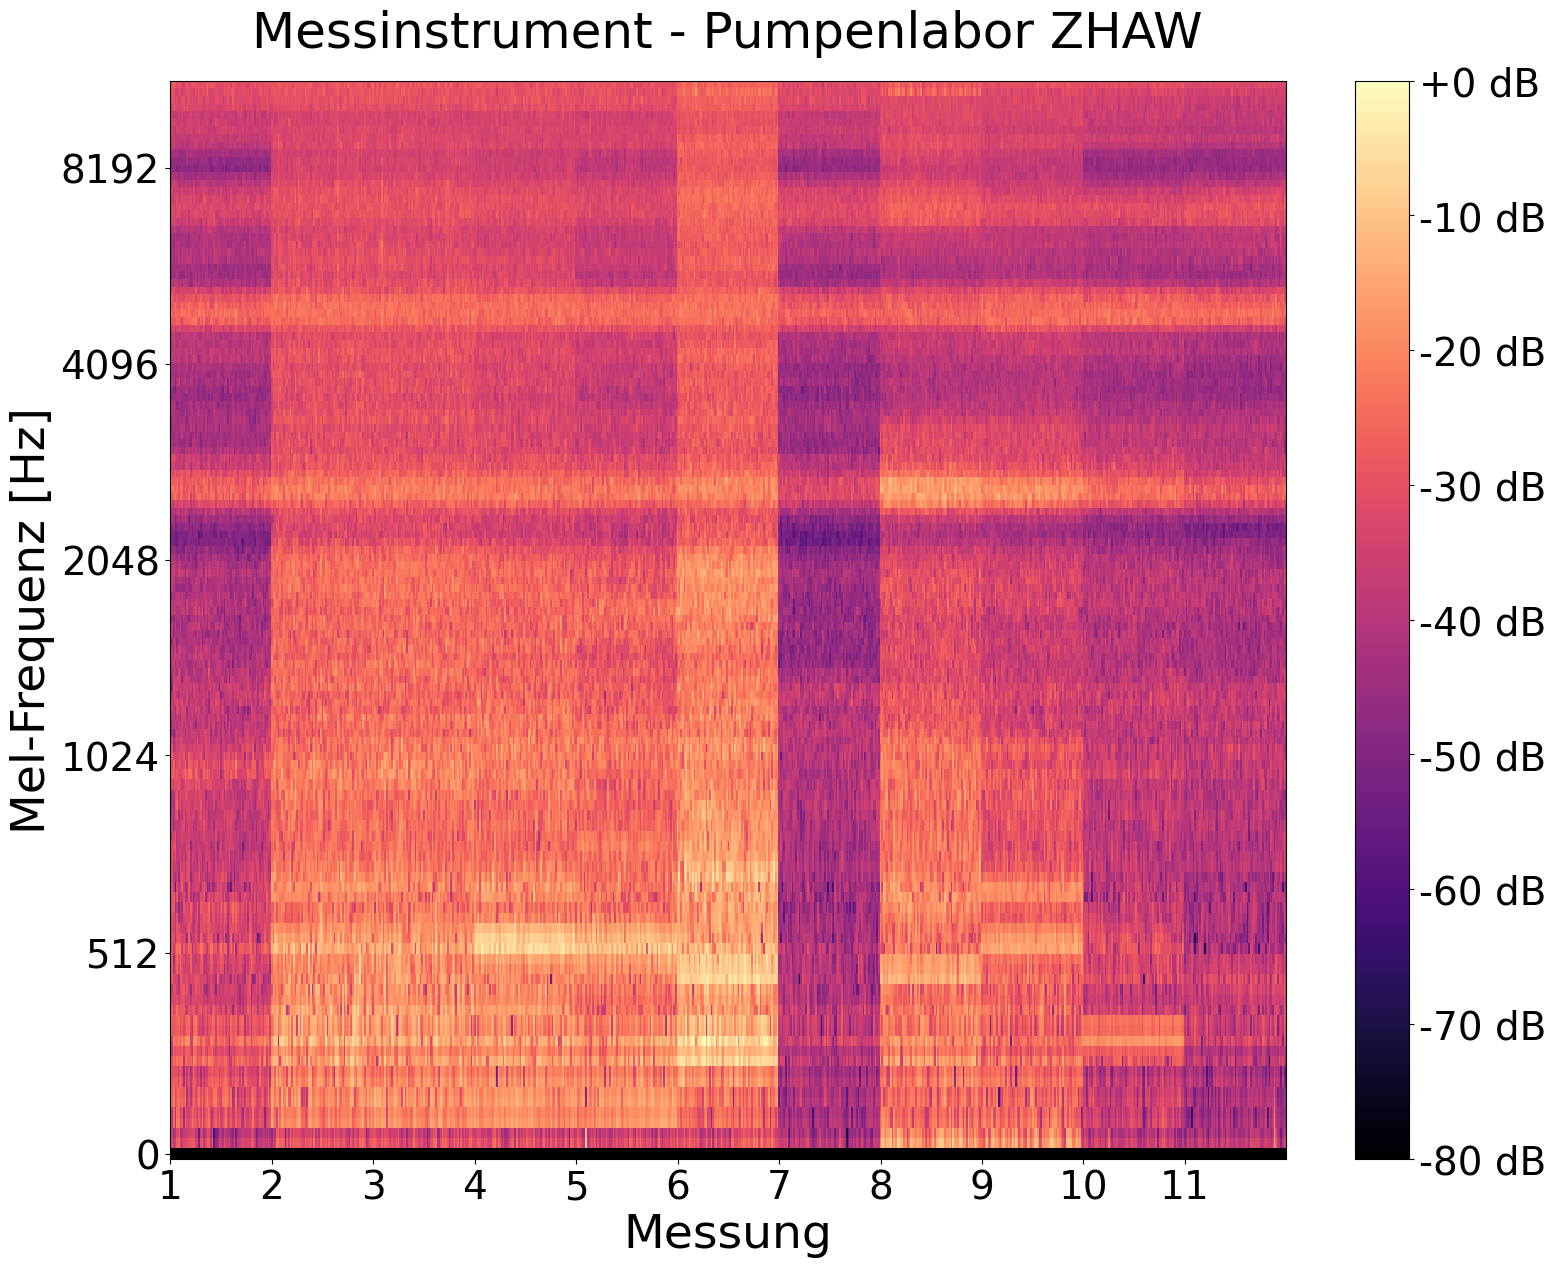

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Convert the Mel spectrogram to dB
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Set sample rate and hop length
sr = 22050
hop_length = 512

fig, axs = plt.subplots(1, 1, figsize=(18, 14))

# Plot the Mel spectrogram
img_mel = librosa.display.specshow(
    mel_spectrogram_db,
    sr=sr,
    hop_length=hop_length,
    y_axis='mel',
    ax=axs
)

# Add title and labels
axs.set_title("Messinstrument - Pumpenlabor ZHAW", fontsize=36, pad = 24)
axs.set_xlabel('Messung', fontsize=34)
axs.set_ylabel('Mel-Frequenz [Hz]', fontsize=34)
axs.tick_params(axis='both', labelsize=28)

# Adjust x-ticks and labels
ticks = np.arange(0, mel_spectrogram_db.shape[1], 60)
labels = np.arange(1, mel_spectrogram_db.shape[1]//60 + 1)
axs.set_xticks(ticks)
axs.set_xticklabels(labels)

# Add colorbar
color_bar = fig.colorbar(img_mel, ax=axs, format="%+2.f dB")
color_bar.ax.tick_params(labelsize=28)
plt.savefig("./img/measurement_zhaw/mel-spec_measurement_zhaw.pdf", dpi = 300)
plt.show()


# Plot each measurement in linear, log and mel-scale

## linear

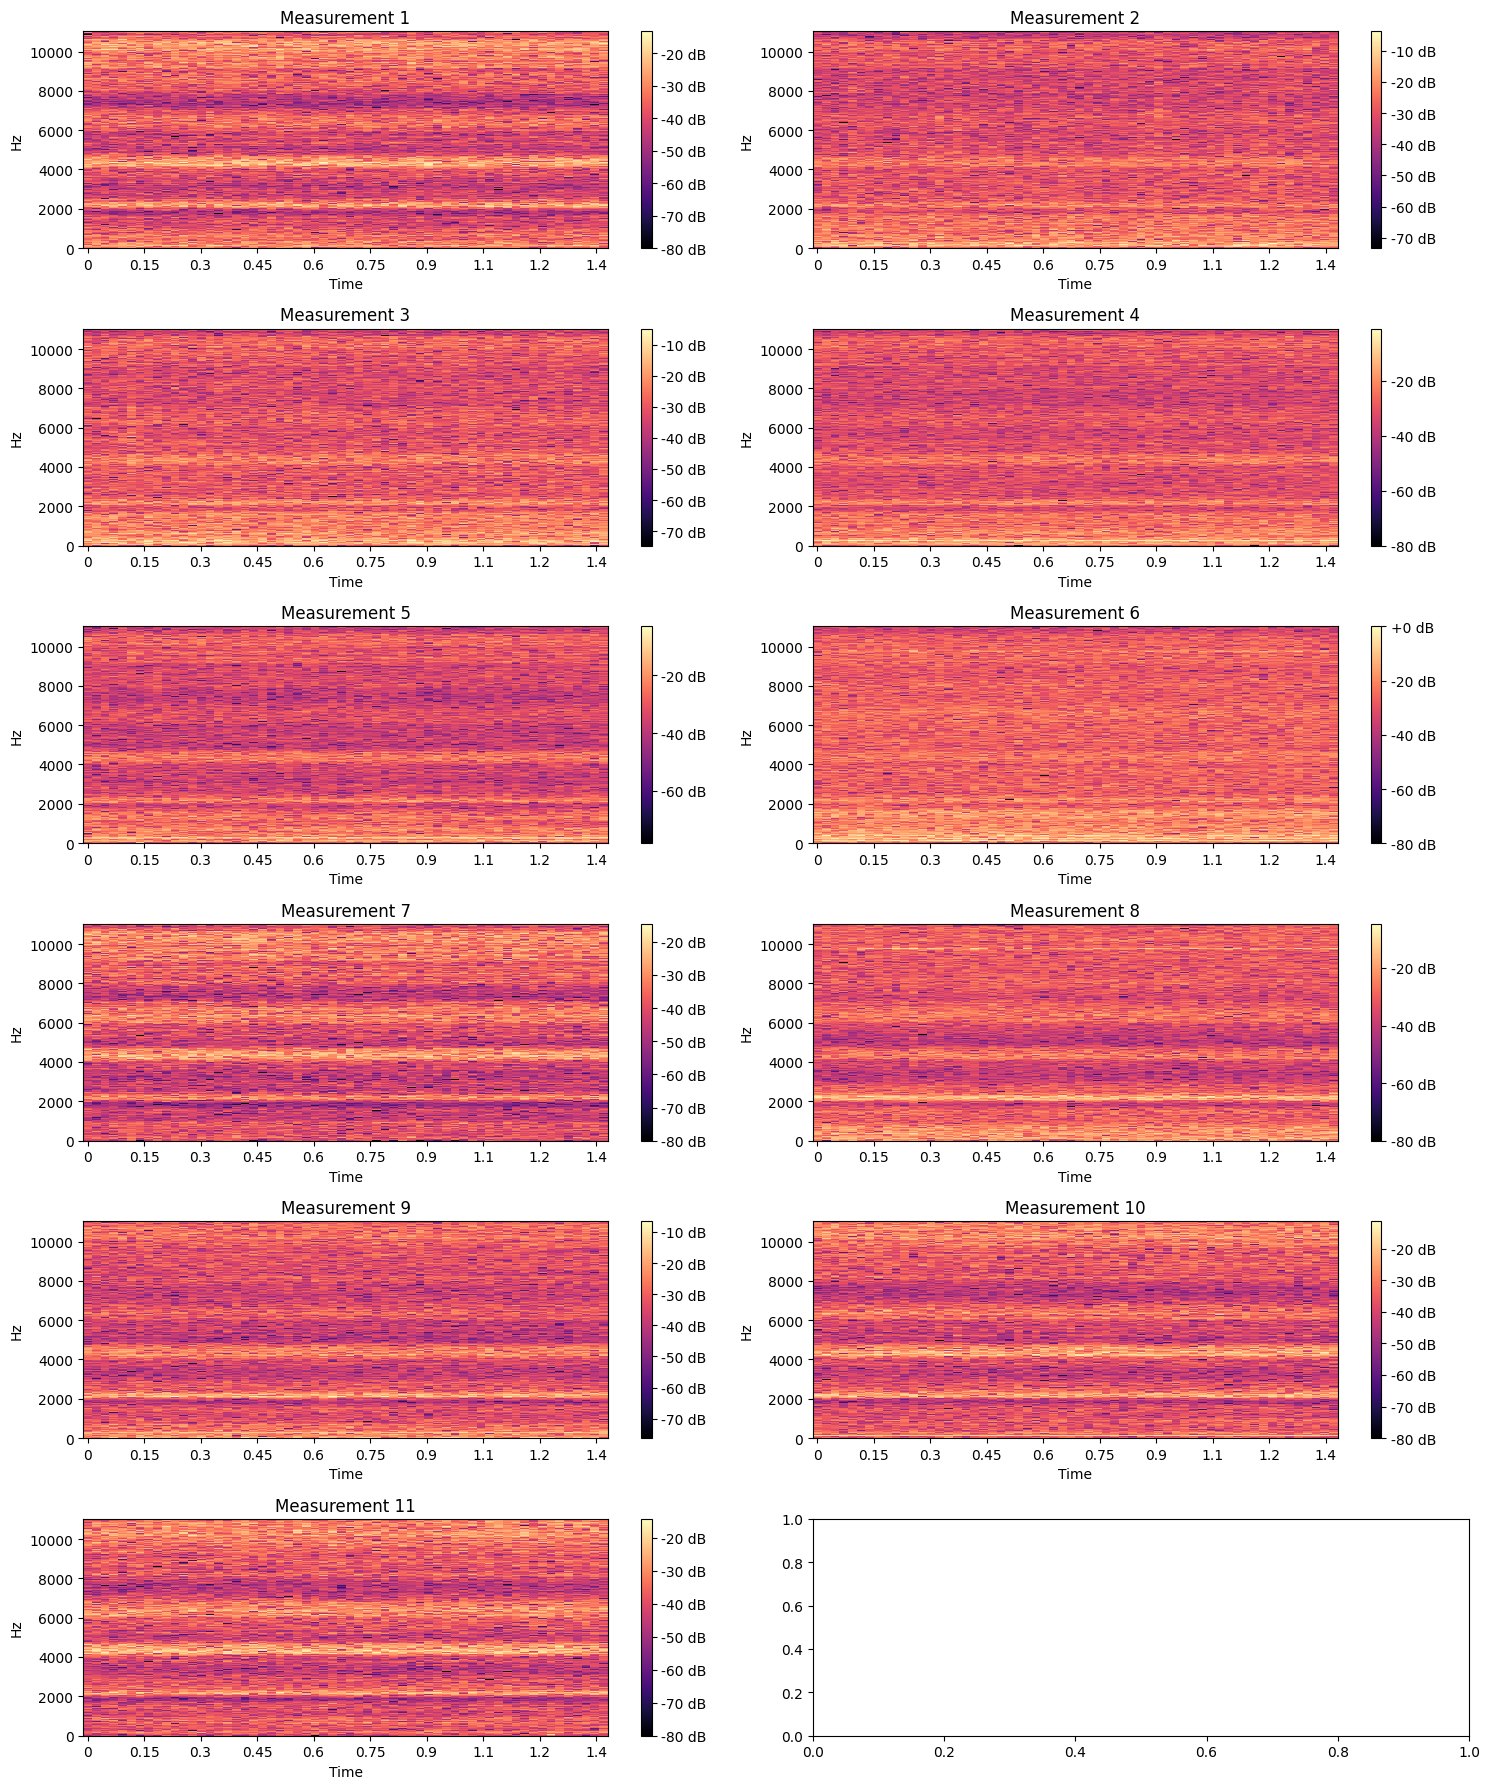

In [63]:
fig, axs = plt.subplots(6, 2, figsize=(15, 18))

for i in range(11):
    # Compute the start and end indices for the measurement
    start_index = i * 60
    end_index = start_index + 60

    # Extract the measurement from the spectrogram
    measurement = spectrogram_db[:, start_index:end_index]

    # Determine the subplot to plot on
    ax = axs[i // 2, i % 2]

    # Plot the measurement
    img = librosa.display.specshow(
        measurement,
        sr=sr,
        hop_length=hop_length,
        x_axis='time',
        y_axis='linear',
        ax=ax
    )
    ax.set_title(f"Measurement {i + 1}")
    
    fig.colorbar(img, ax=ax, format="%+2.f dB")

plt.tight_layout()
plt.savefig("./img/measurement_zhaw/all_linear.pdf", dpi = 300)
plt.show()


## log

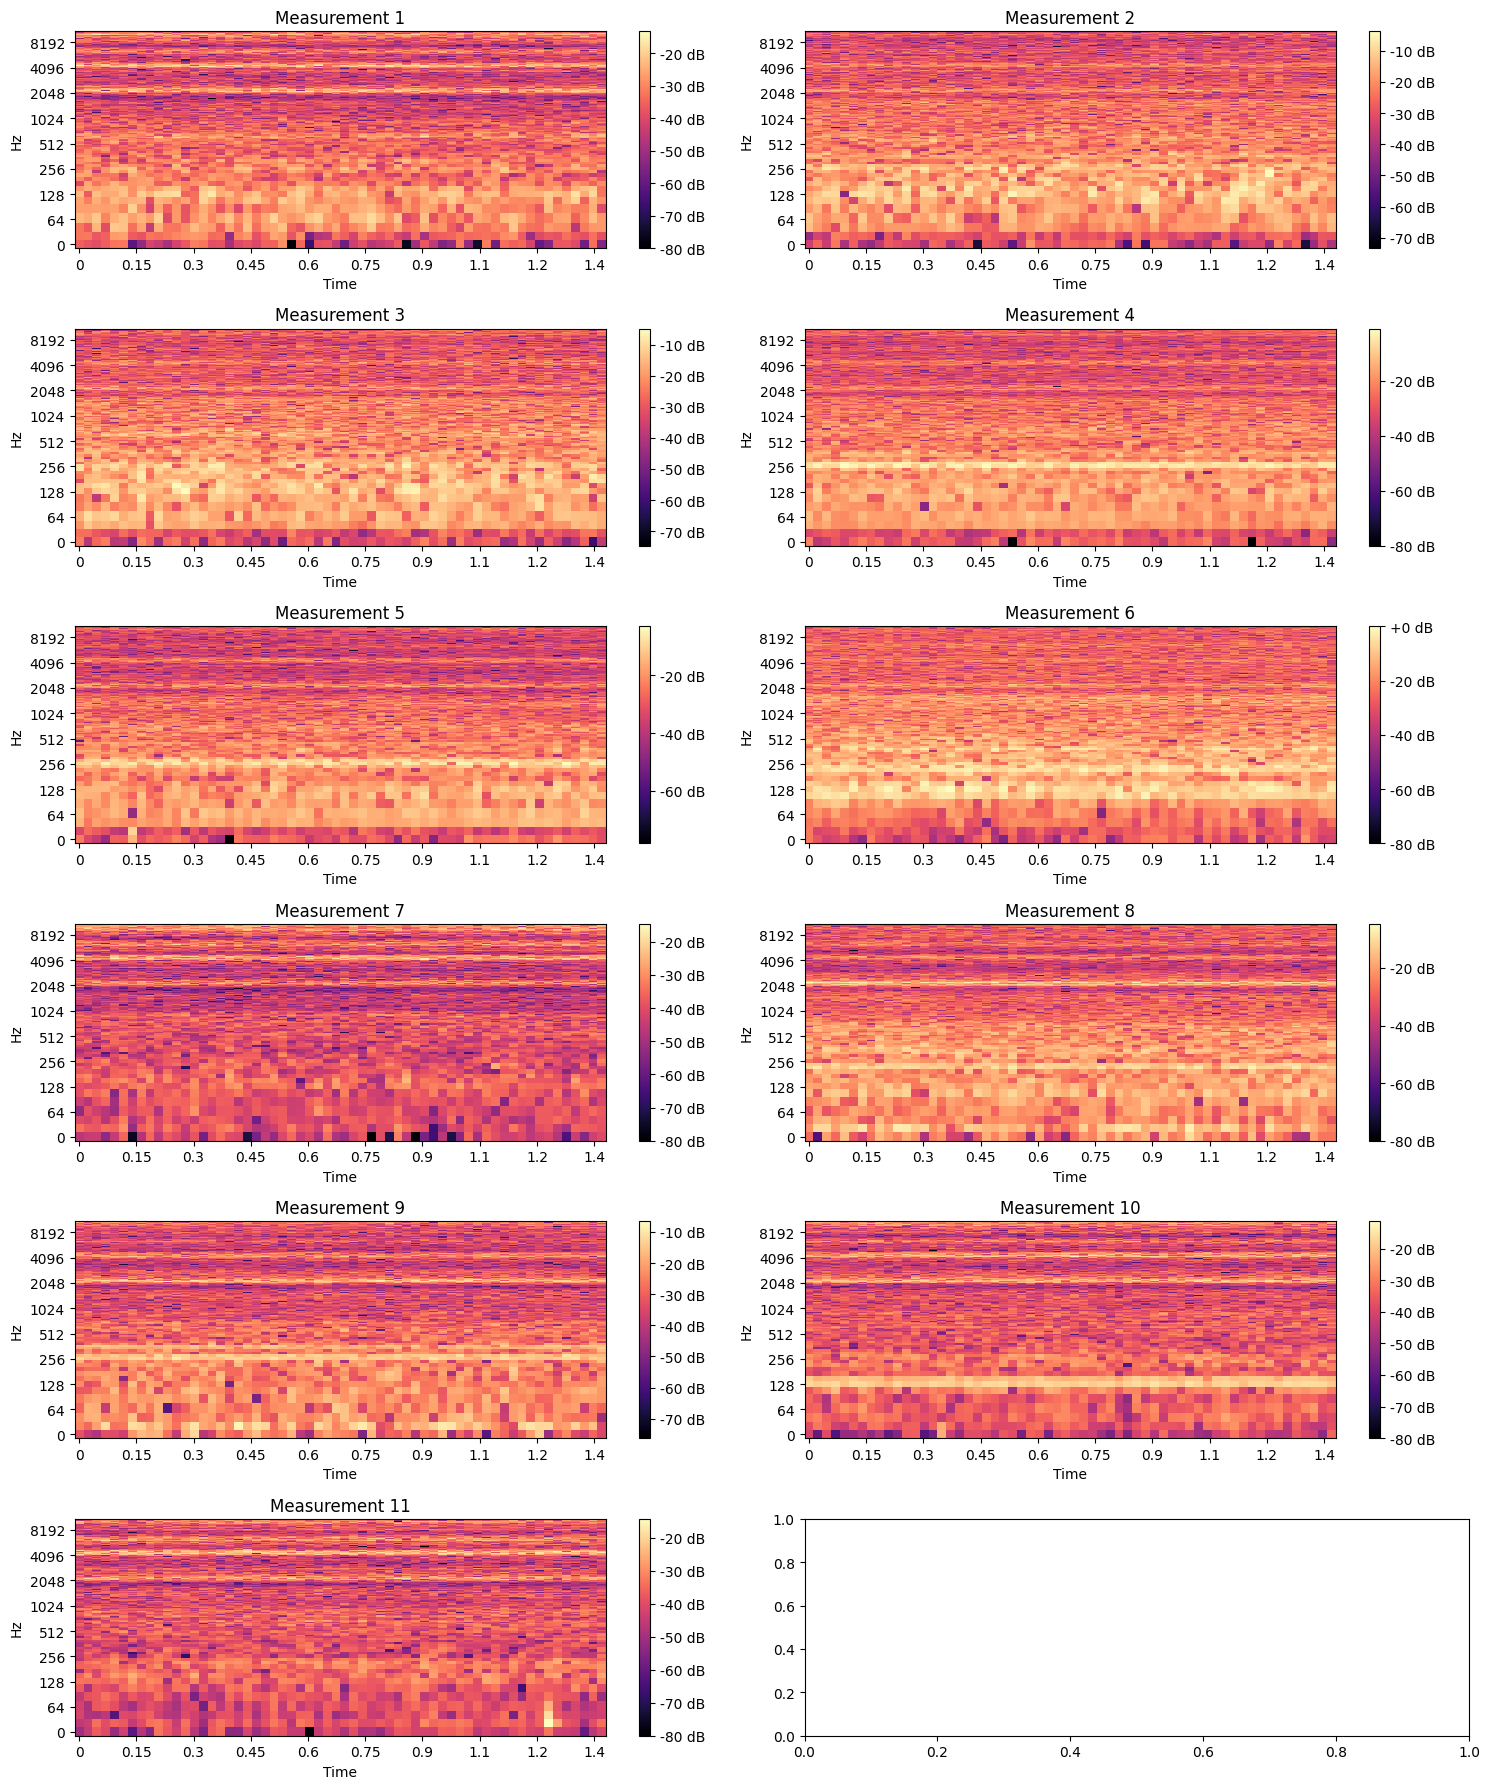

In [66]:
fig, axs = plt.subplots(6, 2, figsize=(15, 18))

for i in range(11):
    # Compute the start and end indices for the measurement
    start_index = i * 60
    end_index = start_index + 60

    # Extract the measurement from the spectrogram
    measurement = spectrogram_db[:, start_index:end_index]

    # Determine the subplot to plot on
    ax = axs[i // 2, i % 2]

    # Plot the measurement
    img = librosa.display.specshow(
        measurement,
        sr=sr,
        hop_length=hop_length,
        x_axis='time',
        y_axis='log',
        ax=ax
    )
    ax.set_title(f"Measurement {i + 1}")
    
    fig.colorbar(img, ax=ax, format="%+2.f dB")

plt.tight_layout()
plt.savefig("./img/measurement_zhaw/all_log.pdf", dpi = 300)
plt.show()


## mel

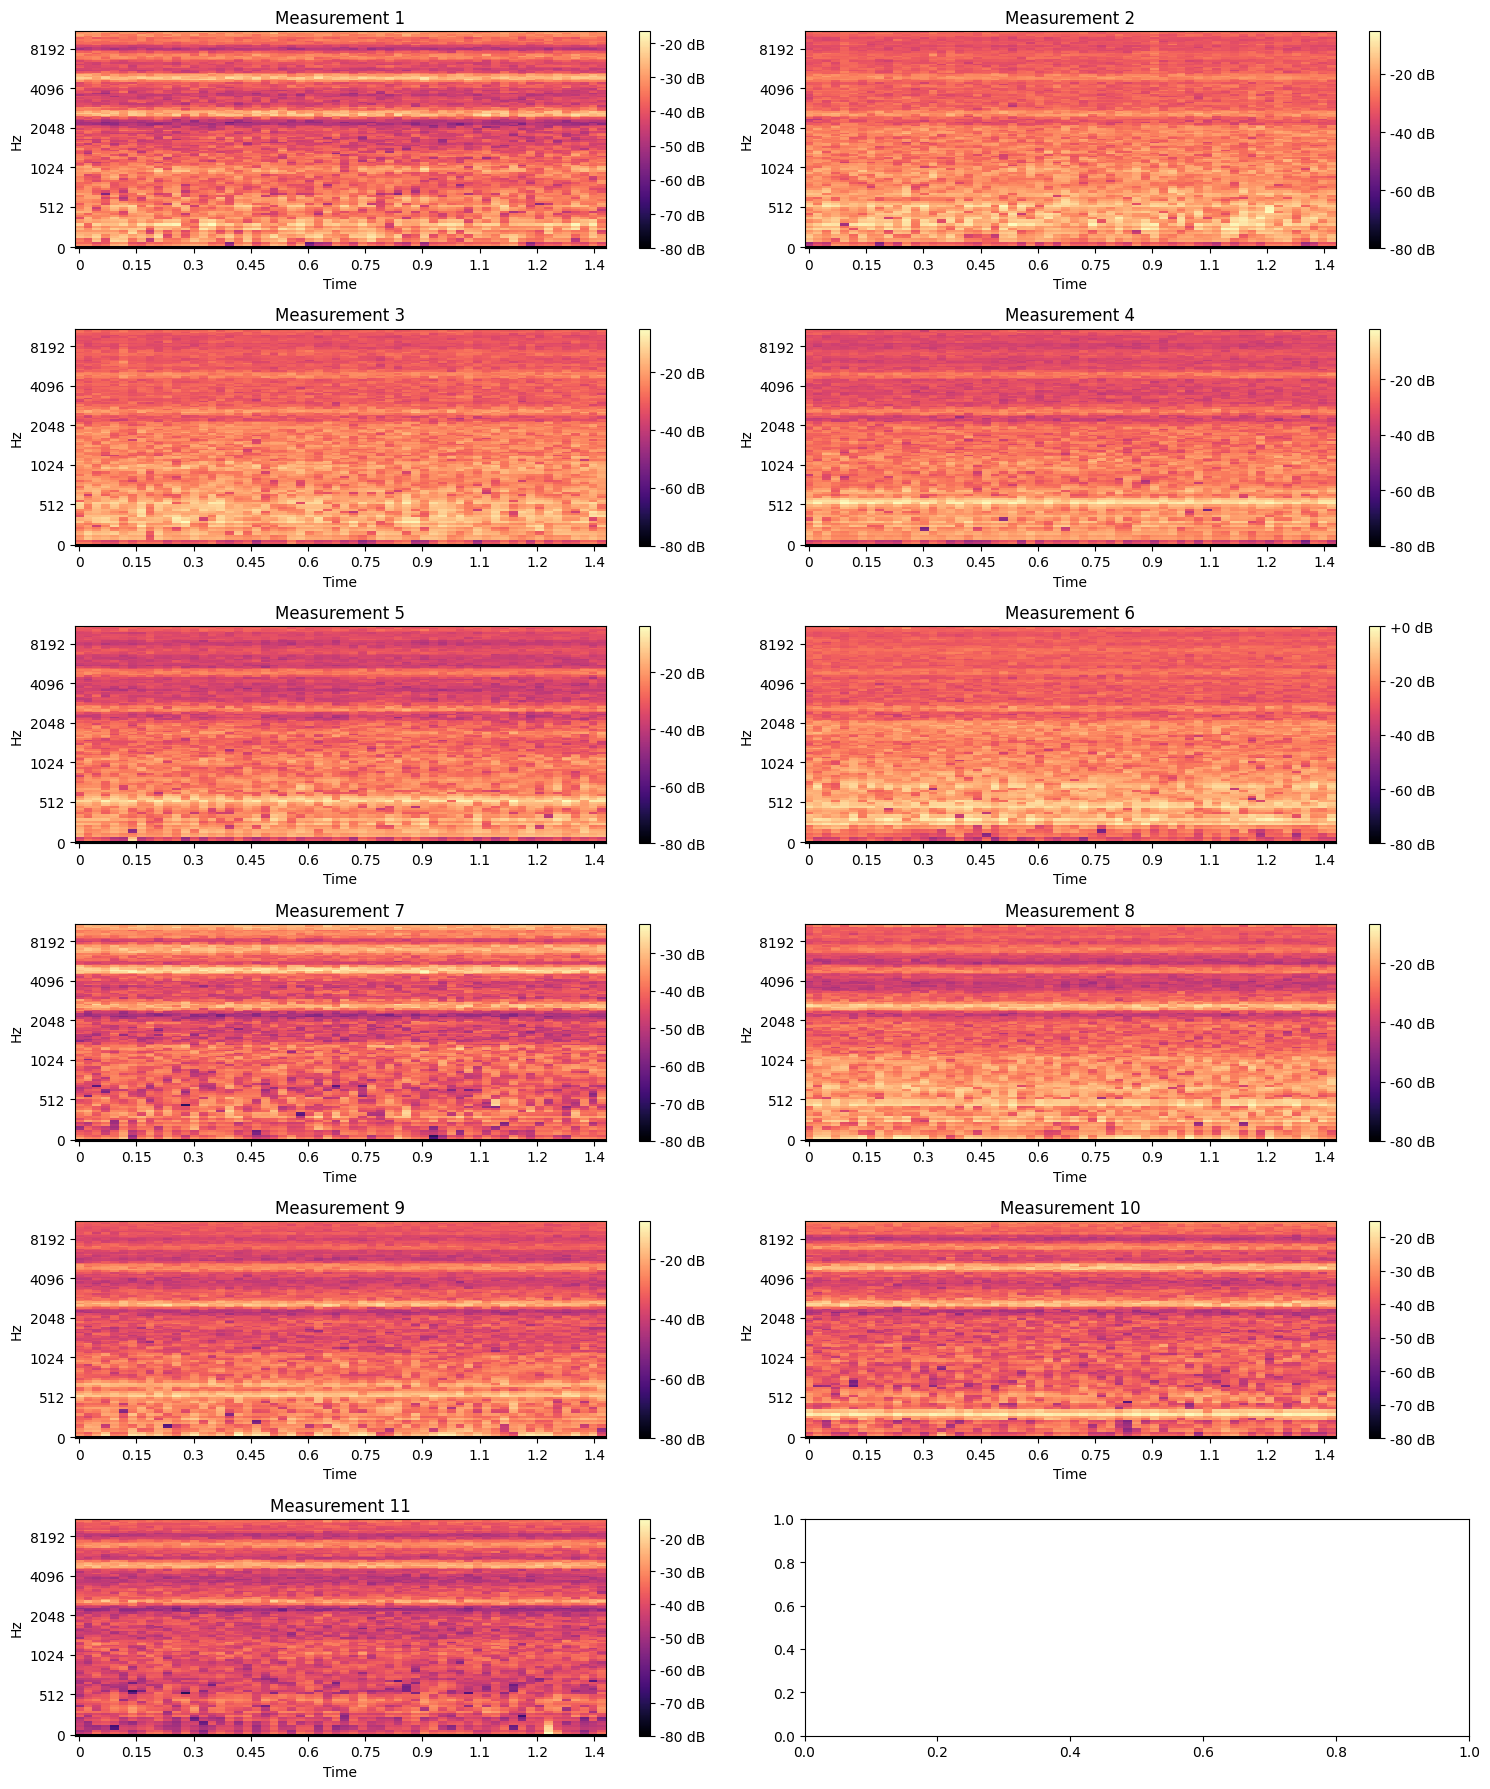

In [67]:
fig, axs = plt.subplots(6, 2, figsize=(15, 18))

for i in range(11):
    # Compute the start and end indices for the measurement
    start_index = i * 60
    end_index = start_index + 60

    # Extract the measurement from the spectrogram
    measurement = mel_spectrogram_db[:, start_index:end_index]

    # Determine the subplot to plot on
    ax = axs[i // 2, i % 2]

    # Plot the measurement
    img = librosa.display.specshow(
        measurement,
        sr=sr,
        hop_length=hop_length,
        x_axis='time',
        y_axis='mel',
        ax=ax
    )
    ax.set_title(f"Measurement {i + 1}")
    
    fig.colorbar(img, ax=ax, format="%+2.f dB")

plt.tight_layout()
plt.savefig("./img/measurement_zhaw/all_mel.pdf", dpi = 300)
plt.show()


# compare linaer, log and mel

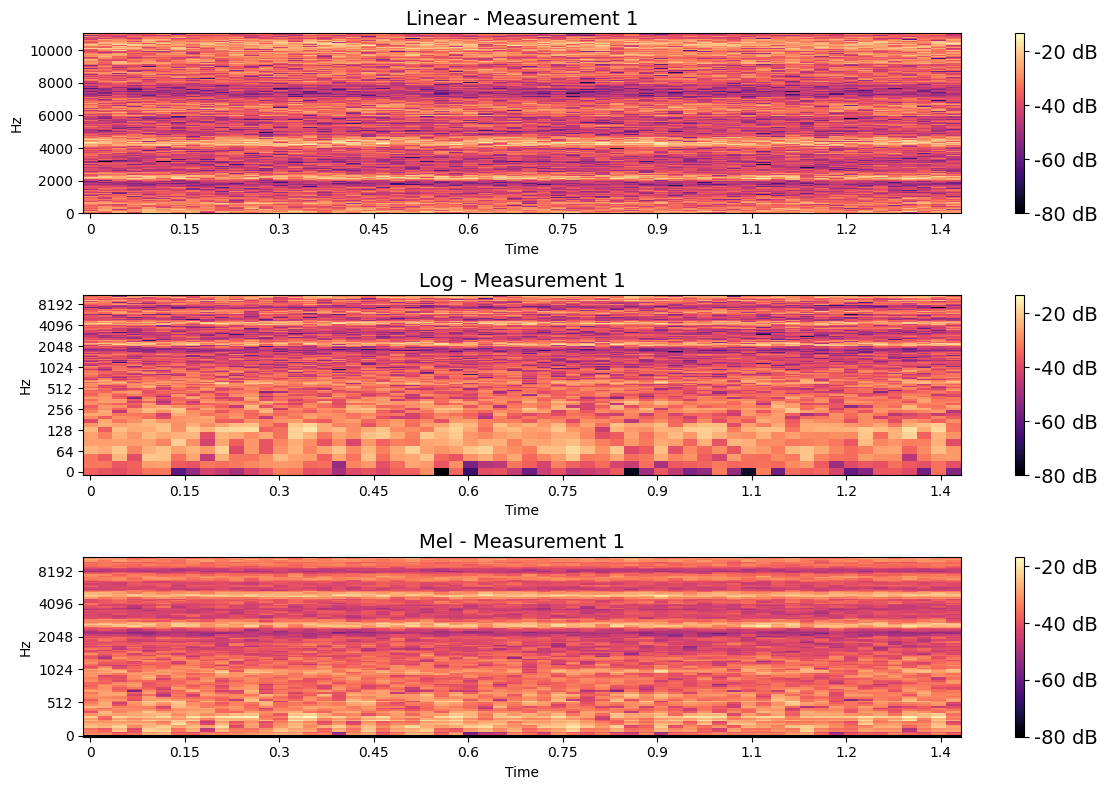

In [81]:
import matplotlib.pyplot as plt
import numpy as np

def plot_measurement(measurement_index):
    # Determine the start and end index for the measurement
    start_index = measurement_index * 60
    end_index = (measurement_index + 1) * 60

    # Extract the measurements from the spectrograms
    linear_measurement = spectrogram_db[:, start_index:end_index]
    log_measurement = spectrogram_db[:, start_index:end_index]
    mel_measurement = mel_spectrogram_db[:, start_index:end_index]

    # Create a figure with 3 subplots
    fig, axs = plt.subplots(3, 1, figsize=(12, 8))

    # Set sample rate and hop length
    sr = 22050
    hop_length = 512

    # Plot the linear spectrogram
    img_linear = librosa.display.specshow(
        linear_measurement,
        sr=sr,
        hop_length=hop_length,
        x_axis='time',
        y_axis='linear',
        ax=axs[0]
    )
    axs[0].set_title("Linear - Measurement "+ str(measurement_index + 1), fontsize=14)
    color_bar = fig.colorbar(img_linear, ax=axs[0], format="%+2.f dB")
    color_bar.ax.tick_params(labelsize=14)

    # Plot the log spectrogram
    img_log = librosa.display.specshow(
        log_measurement,
        sr=sr,
        hop_length=hop_length,
        x_axis='time',
        y_axis='log',
        ax=axs[1]
    )
    axs[1].set_title("Log - Measurement "+ str(measurement_index + 1), fontsize=14)
    color_bar = fig.colorbar(img_log, ax=axs[1], format="%+2.f dB")
    color_bar.ax.tick_params(labelsize=14)

    # Plot the Mel spectrogram
    img_mel = librosa.display.specshow(
        mel_measurement,
        sr=sr,
        hop_length=hop_length,
        x_axis='time',
        y_axis='mel',
        ax=axs[2]
    )
    axs[2].set_title("Mel - Measurement "+ str(measurement_index + 1), fontsize=14)
    color_bar = fig.colorbar(img_mel, ax=axs[2], format="%+2.f dB")
    color_bar.ax.tick_params(labelsize=14)

    # Display the plots
    plt.tight_layout()
    plt.savefig(f"./img/measurement_zhaw/compare_all_{measurement_index+1}.pdf", dpi = 300)
    plt.show()

# Now you can use the function to compare different measurements
# For example, to compare the 1st measurement:
plot_measurement(0)
